In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '../Data/Jikimu Fund.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Jikimu Fund,1.912265e+10,1.201808e+08,159.1157,159.1157,155.9333,2022-12-30
1,Jikimu Fund,1.909805e+10,1.201027e+08,159.0143,159.0143,155.8340,2022-12-29
2,Jikimu Fund,1.911025e+10,1.202059e+08,158.9794,158.9794,155.7998,2022-12-28
3,Jikimu Fund,1.910533e+10,1.202008e+08,158.9450,158.9450,155.7661,2022-12-27
4,Jikimu Fund,1.908263e+10,1.201617e+08,158.8080,158.8080,155.6318,2022-12-23


In [4]:
# Assuming you already have a DataFrame called 'df'
data['Date Valued'] = pd.to_datetime(data['Date Valued'])

In [5]:
df=data[['Scheme Name','Net Asset Value','Outstanding Number of Units','Nav Per Unit','Sale Price per Unit','Repurchase Price/Unit','Date Valued']]
df.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Jikimu Fund,1.912265e+10,1.201808e+08,159.1157,159.1157,155.9333,2022-12-30
1,Jikimu Fund,1.909805e+10,1.201027e+08,159.0143,159.0143,155.8340,2022-12-29
2,Jikimu Fund,1.911025e+10,1.202059e+08,158.9794,158.9794,155.7998,2022-12-28
3,Jikimu Fund,1.910533e+10,1.202008e+08,158.9450,158.9450,155.7661,2022-12-27
4,Jikimu Fund,1.908263e+10,1.201617e+08,158.8080,158.8080,155.6318,2022-12-23


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Net Asset Value,1668.0,19805775221.289398,146107741.12,17747240026.934998,19887497045.57,21752888234.810001,37750146571.760002,2338831133.568645
Outstanding Number of Units,1668.0,163612968.225594,9033915.58,121925594.2775,156892554.685,172243410.15,20261779035.959999,502108171.097761
Nav Per Unit,1668.0,135.003994,121.1603,126.07405,128.3523,144.713625,535.5153,16.679645
Sale Price per Unit,1668.0,135.00353,121.1603,126.07405,128.3523,144.713625,535.5153,16.679868
Repurchase Price/Unit,1668.0,132.318448,118.7371,123.552575,125.7914,141.81935,530.1602,16.489288
Date Valued,1668,2019-09-25 13:22:00.863309312,2017-01-03 00:00:00,2017-12-18 00:00:00,2019-08-18 12:00:00,2021-04-24 00:00:00,2022-12-30 00:00:00,NaN


In [7]:
#log transformation
df['Log_NAV'] = np.log(df['Net Asset Value'])

# Square Root Transformation
df['Sqrt_NAV'] = np.sqrt(df['Net Asset Value'])

#log transformation
df['Log_ONU'] = np.log(df['Outstanding Number of Units'])

# Square Root Transformation
df['Sqrt_ONU'] = np.sqrt(df['Outstanding Number of Units'])

from scipy.stats.mstats import winsorize
df['Winsorized_ONU'] = winsorize(df['Outstanding Number of Units'], limits=[0.01, 0.01])

# Display the first few rows to check the results
print(df[['Net Asset Value', 'Sqrt_ONU', 'Log_ONU','Winsorized_ONU', 'Sqrt_NAV', 'Log_NAV']].head())

   Net Asset Value      Sqrt_ONU    Log_ONU  Winsorized_ONU       Sqrt_NAV  \
0     1.912265e+10  10962.700983  18.604508    1.201808e+08  138284.666172   
1     1.909805e+10  10959.137765  18.603858    1.201027e+08  138195.676577   
2     1.911025e+10  10963.843563  18.604716    1.202059e+08  138239.837793   
3     1.910533e+10  10963.614633  18.604675    1.202008e+08  138222.014706   
4     1.908263e+10  10961.827687  18.604349    1.201617e+08  138139.909579   

     Log_NAV  
0  23.674139  
1  23.672852  
2  23.673491  
3  23.673233  
4  23.672045  


In [8]:
nav = df[['Sqrt_NAV', 'Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit','Date Valued']]
nav.head()

,Sqrt_NAV,Log_ONU,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,138284.666172,18.604508,159.1157,159.1157,155.9333,2022-12-30
1,138195.676577,18.603858,159.0143,159.0143,155.8340,2022-12-29
2,138239.837793,18.604716,158.9794,158.9794,155.7998,2022-12-28
3,138222.014706,18.604675,158.9450,158.9450,155.7661,2022-12-27
4,138139.909579,18.604349,158.8080,158.8080,155.6318,2022-12-23


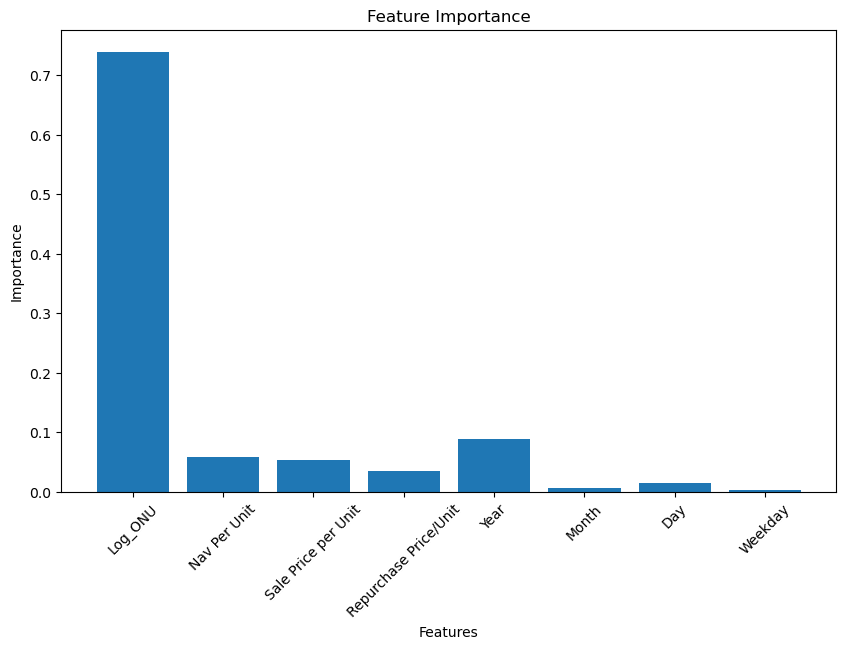

In [9]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'nav' is your DataFrame with a 'Date Valued' column
nav['Year'] = nav['Date Valued'].dt.year
nav['Month'] = nav['Date Valued'].dt.month
nav['Day'] = nav['Date Valued'].dt.day
nav['Weekday'] = nav['Date Valued'].dt.weekday

# Now, drop the original 'Date Valued' column as it's no longer needed as a feature
nav = nav.drop(columns=['Date Valued'])

# Define your features (X) and target (y)
X = nav.drop(columns=['Sqrt_NAV'])
y = nav['Sqrt_NAV']

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [10]:
nav.to_csv('NAV Jikimu Fund.csv', index=False)

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
# X should be a DataFrame with multiple columns, not a Series
X = nav[['Repurchase Price/Unit']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Return accuracy metrics for Gradient Boosting and Random Forest
accuracy_metrics = {
    'Gradient Boosting MAE': gb_mae,
    'Gradient Boosting RMSE': gb_rmse,
    'Gradient Boosting R^2': gb_r2,
    'Random Forest MAE': rf_mae,
    'Random Forest RMSE': rf_rmse,
    'Random Forest R^2': rf_r2,
}

accuracy_metrics


{'Gradient Boosting MAE': 2165.3885528683663,
 'Gradient Boosting RMSE': 7717.11037668471,
 'Gradient Boosting R^2': 0.4214346242537279,
 'Random Forest MAE': 2269.046390348716,
 'Random Forest RMSE': 7912.270901436774,
 'Random Forest R^2': 0.3918015452469177}

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year', 'Month', 'Day', 'Weekday']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Iterate through the models and evaluate their performance
for name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


          Model Name          MAE           MSE         RMSE       R^2
0  Linear Regression  3400.357545  6.504012e+07  8064.745719  36.8135%
1      Decision Tree   451.513529  4.669331e+07  6833.250456  54.6374%
2      Random Forest   520.293510  4.831951e+07  6951.223756  53.0576%
3  Gradient Boosting   521.570880  4.873304e+07  6980.905449  52.6558%
4      KNN Regressor  1526.888972  5.416823e+07  7359.907078  47.3755%
5  XGBoost Regressor   648.983099  6.019306e+07  7758.418560  41.5224%


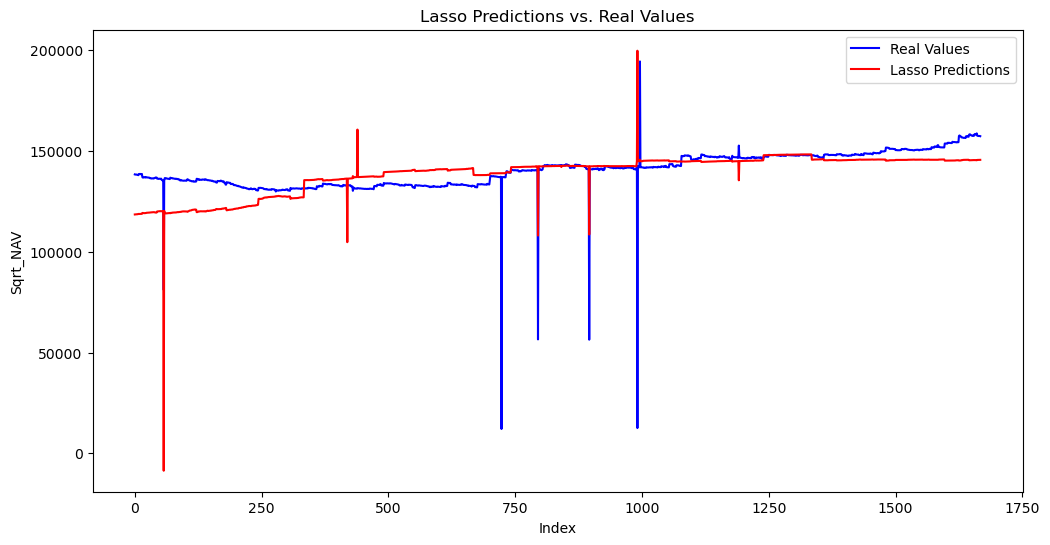

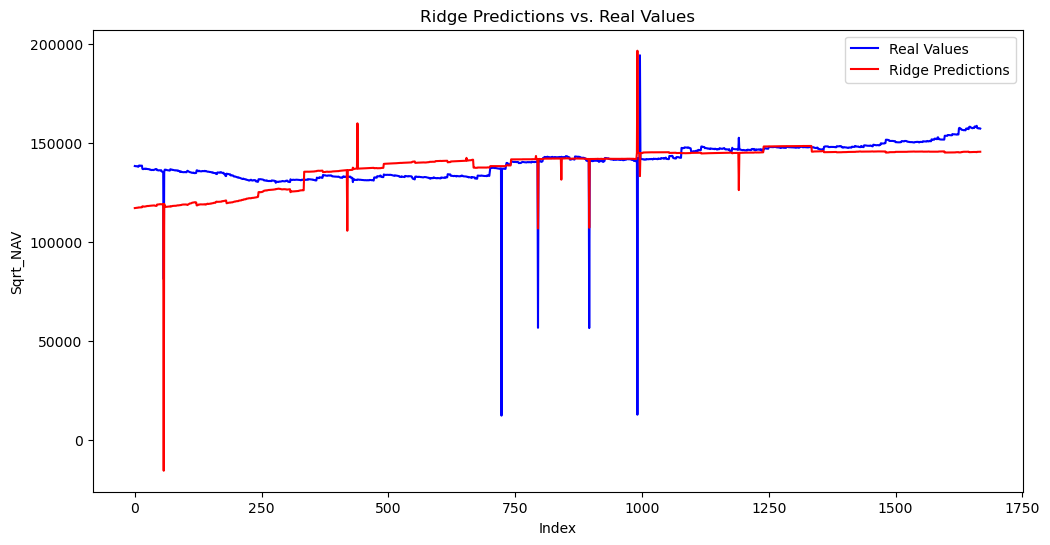

Lasso Results:
        Real Values  Lasso Predictions
0     138284.666172      118429.147855
1     138195.676577      118476.870777
2     138239.837793      118483.357016
3     138222.014706      118497.894147
4     138139.909579      118557.140114
...             ...                ...
1663  157314.320009      145500.038418
1664  157379.764691      145480.562867
1665  157274.056302      145500.323503
1666  157379.764691      145480.562867
1667  157246.445098      145507.742823

[1668 rows x 2 columns]

Ridge Results:
        Real Values  Ridge Predictions
0     138284.666172      117026.365446
1     138195.676577      117083.260346
2     138239.837793      117092.630964
3     138222.014706      117110.192178
4     138139.909579      117181.074632
...             ...                ...
1663  157314.320009      145502.114653
1664  157379.764691      145482.507204
1665  157274.056302      145502.334556
1666  157379.764691      145482.507204
1667  157246.445098      145509.807225

[1668 r

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Perform cross-validation and make predictions for Lasso and Ridge
lasso_predictions = cross_val_predict(lasso_model, X, y, cv=5)
ridge_predictions = cross_val_predict(ridge_model, X, y, cv=5)

# Create line plots with real values as blue lines and predicted values as red lines for Lasso
plt.figure(figsize=(12, 6))
plt.plot(y, color='blue', label='Real Values')
plt.plot(lasso_predictions, color='red', label='Lasso Predictions')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Lasso Predictions vs. Real Values')
plt.legend()
plt.show()

# Create line plots with real values as blue lines and predicted values as red lines for Ridge
plt.figure(figsize=(12, 6))
plt.plot(y, color='blue', label='Real Values')
plt.plot(ridge_predictions, color='red', label='Ridge Predictions')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Ridge Predictions vs. Real Values')
plt.legend()
plt.show()

# Create a DataFrame to store real values and predicted values for Lasso
lasso_results_df = pd.DataFrame({'Real Values': y, 'Lasso Predictions': lasso_predictions})

# Create a DataFrame to store real values and predicted values for Ridge
ridge_results_df = pd.DataFrame({'Real Values': y, 'Ridge Predictions': ridge_predictions})

# Display the results DataFrames
print("Lasso Results:")
print(lasso_results_df)

print("\nRidge Results:")
print(ridge_results_df)

# Calculate RMSE, MAE, MSE, and R-squared for Lasso Predictions
lasso_rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
lasso_mae = mean_absolute_error(y, lasso_predictions)
lasso_mse = mean_squared_error(y, lasso_predictions)
lasso_r2 = r2_score(y, lasso_predictions)

# Calculate RMSE, MAE, MSE, and R-squared for Ridge Predictions
ridge_rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
ridge_mae = mean_absolute_error(y, ridge_predictions)
ridge_mse = mean_squared_error(y, ridge_predictions)
ridge_r2 = r2_score(y, ridge_predictions)

# Print the accuracy metrics for Lasso
print("Lasso Metrics:")
print(f"RMSE: {lasso_rmse:.4f}")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")
print(f"R-squared: {lasso_r2:.4f}")

# Print the accuracy metrics for Ridge
print("\nRidge Metrics:")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"MAE: {ridge_mae:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"R-squared: {ridge_r2:.4f}")

Model Evaluation Metrics:
          Model Name          MAE           MSE         RMSE       R^2
0  Linear Regression  3564.882567  6.536885e+07  8085.100517  36.4941%
1      Decision Tree   436.882509  4.666521e+07  6831.194148  54.6647%
2      Random Forest   488.070428  4.760499e+07  6899.637060  53.7517%
3  Gradient Boosting   523.366647  4.944973e+07  7032.050312  51.9596%
4      KNN Regressor  1183.965658  4.838631e+07  6956.027129  52.9927%
5  XGBoost Regressor   634.554198  6.017941e+07  7757.539173  41.5357%


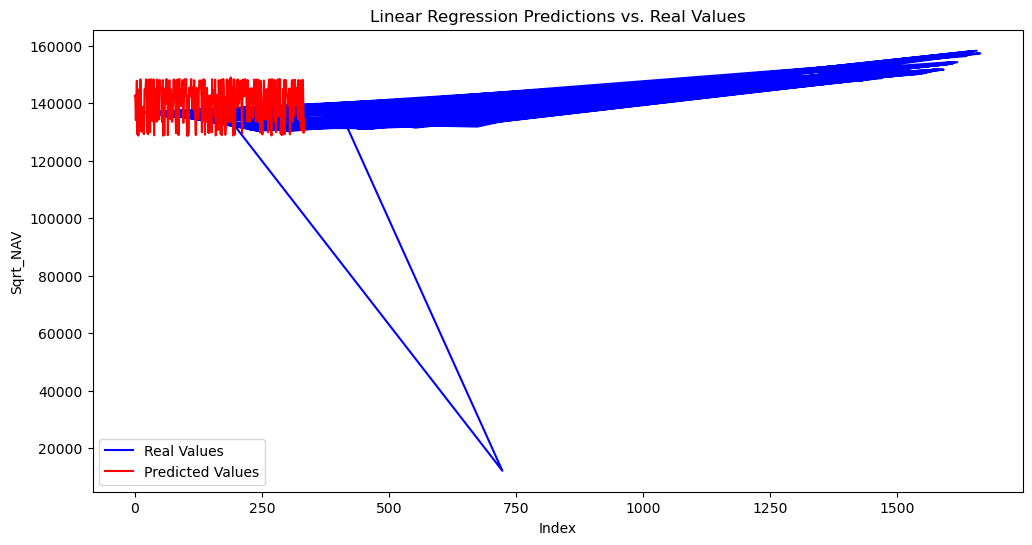

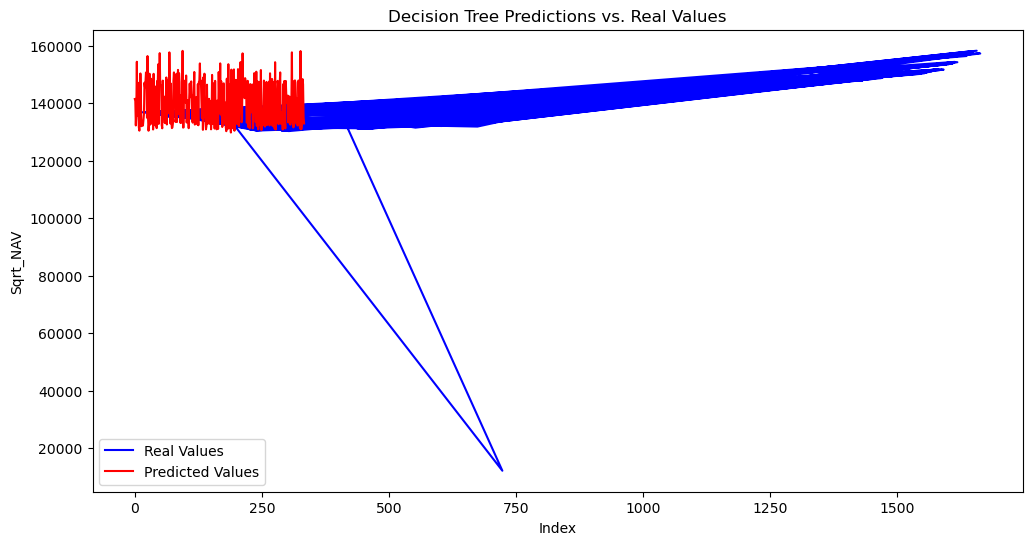

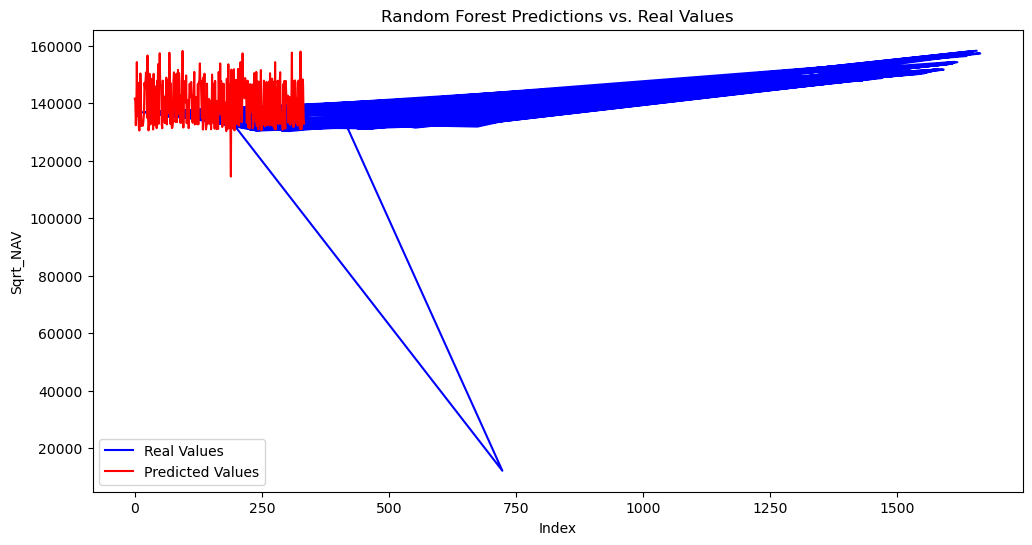

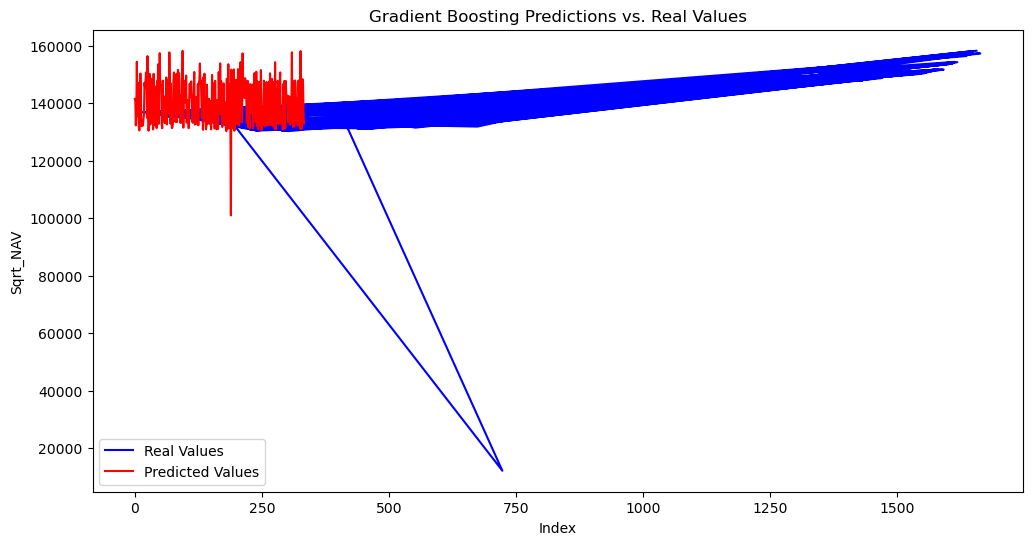

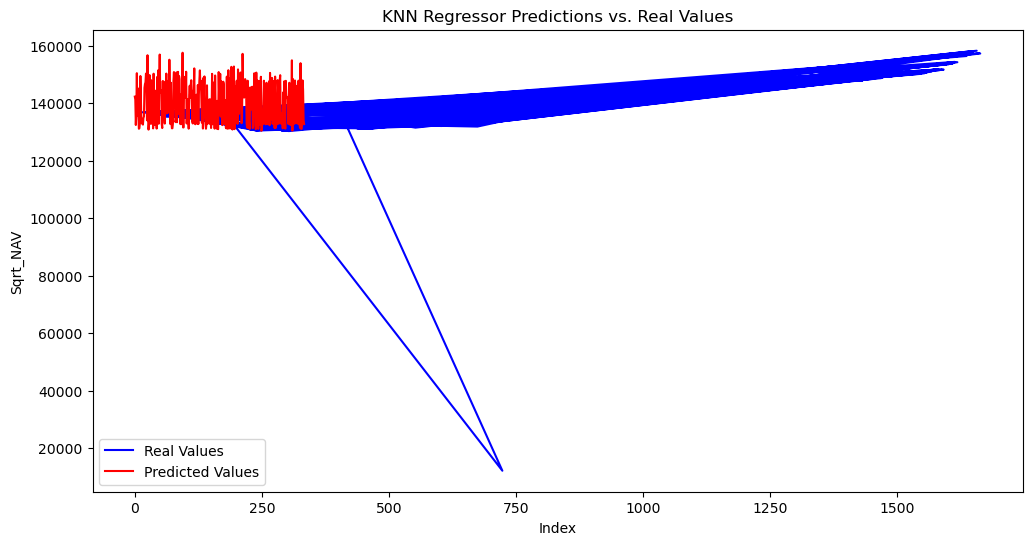

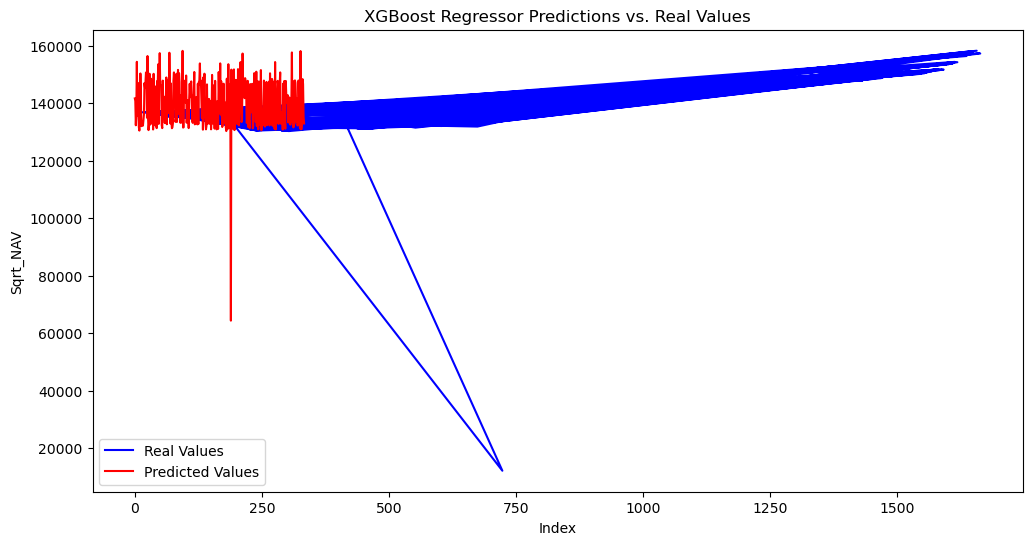

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Create a dictionary to store real values and predicted values for each model
model_predictions = {}

# Iterate through the models and evaluate their performance
for name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

    # Store real values and predicted values in the dictionary
    model_predictions[name] = {'Real Values': y_test, 'Predicted Values': predictions}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("Model Evaluation Metrics:")
print(results_df)

# Create line plots with real values as blue lines and predicted values as red lines for each model
for name, predictions in model_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['Real Values'], color='blue', label='Real Values')
    plt.plot(predictions['Predicted Values'], color='red', label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Sqrt_NAV')
    plt.title(f'{name} Predictions vs. Real Values')
    plt.legend()
    plt.show()

Cross-Validation Model Evaluation Metrics:
          Model Name          MAE           MSE         RMSE        R^2
0  Linear Regression  5775.317565  9.830229e+07  9914.751377  -13.6598%
1      Decision Tree  2134.570525  4.971526e+07  7050.904593   42.5179%
2      Random Forest  1612.198736  3.854838e+07  6208.734045   55.4293%
3  Gradient Boosting  2153.219323  5.013439e+07  7080.564534   42.0332%
4      KNN Regressor  3340.929058  5.064826e+07  7116.759157   41.4391%
5  XGBoost Regressor  2812.004682  4.972487e+07  7051.586249   42.5067%


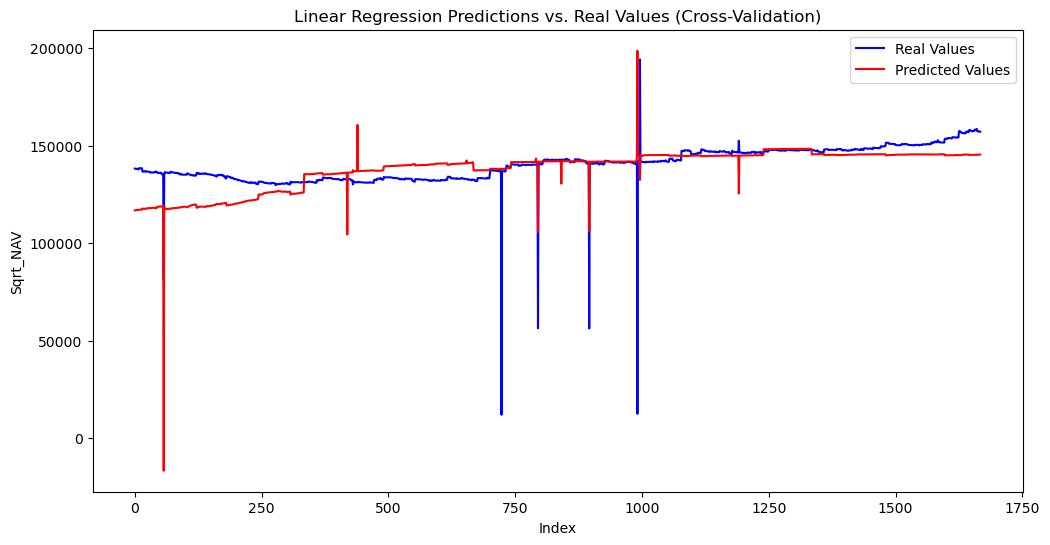

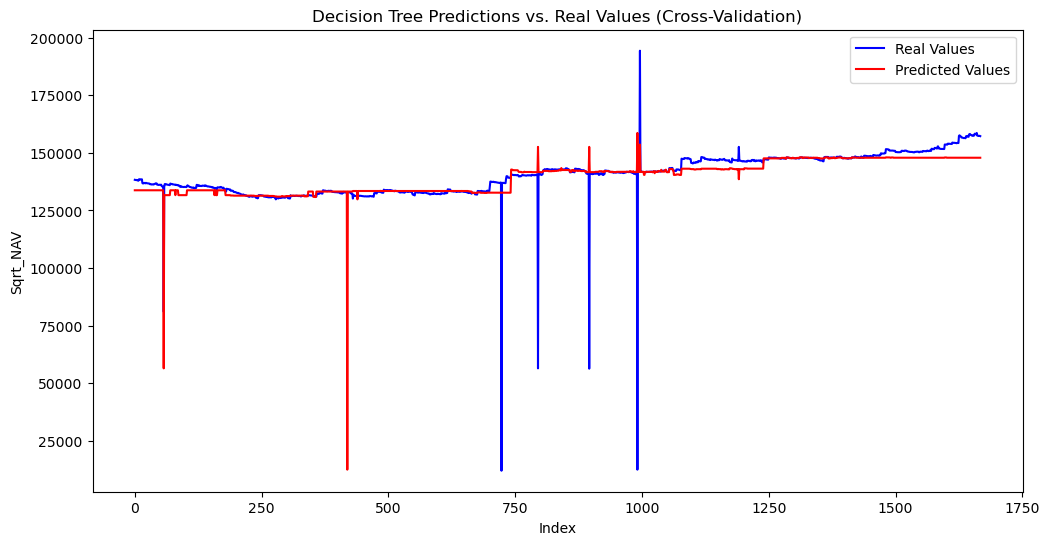

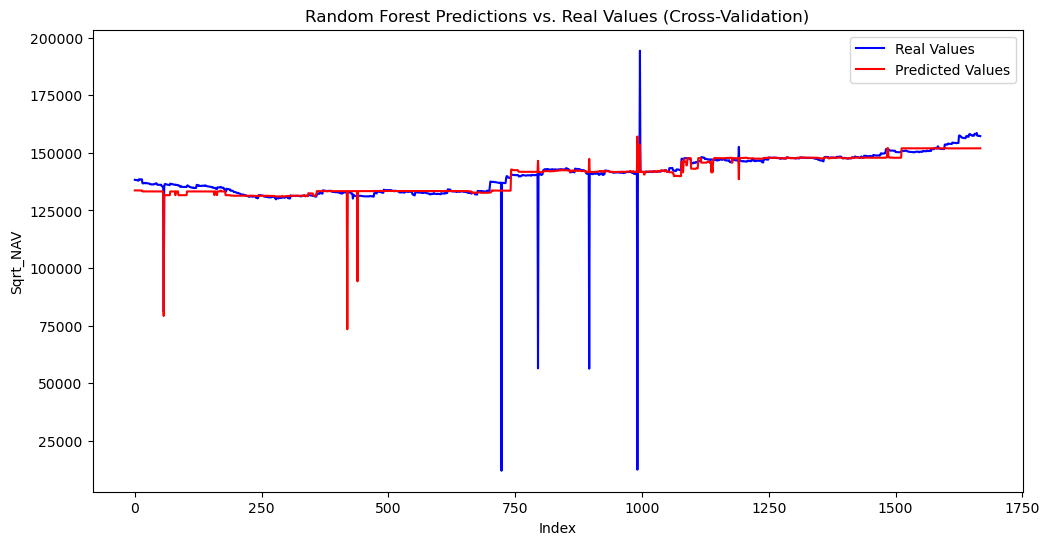

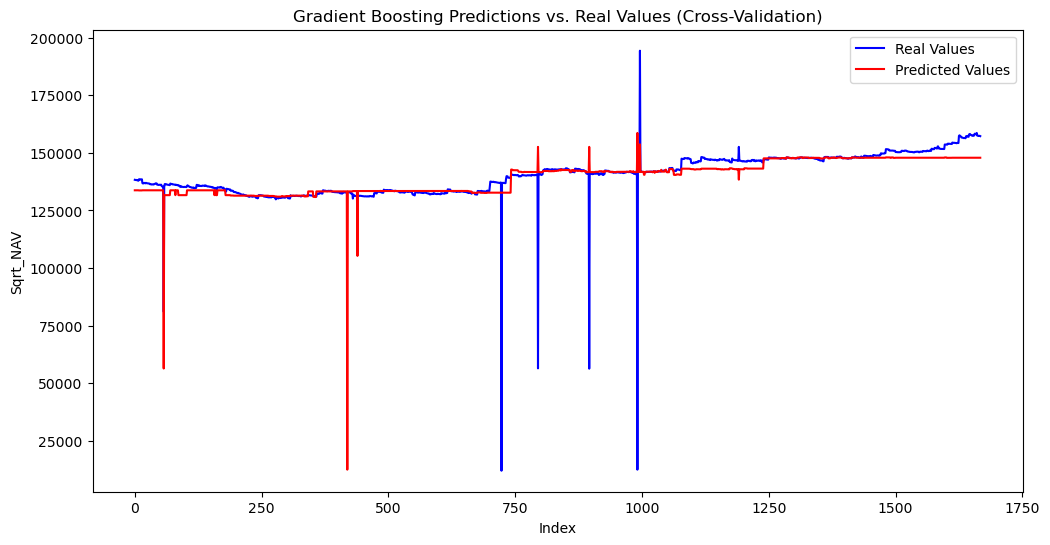

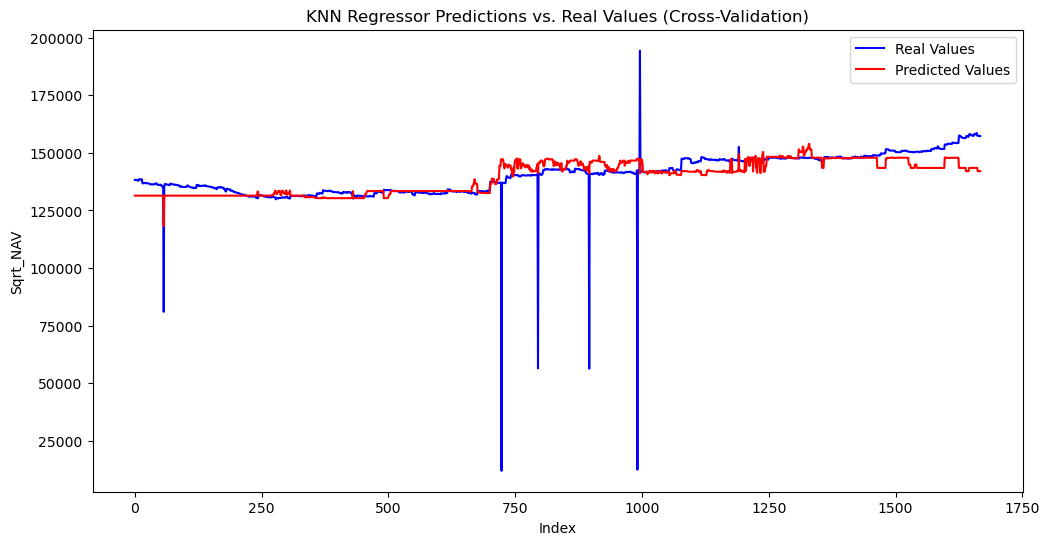

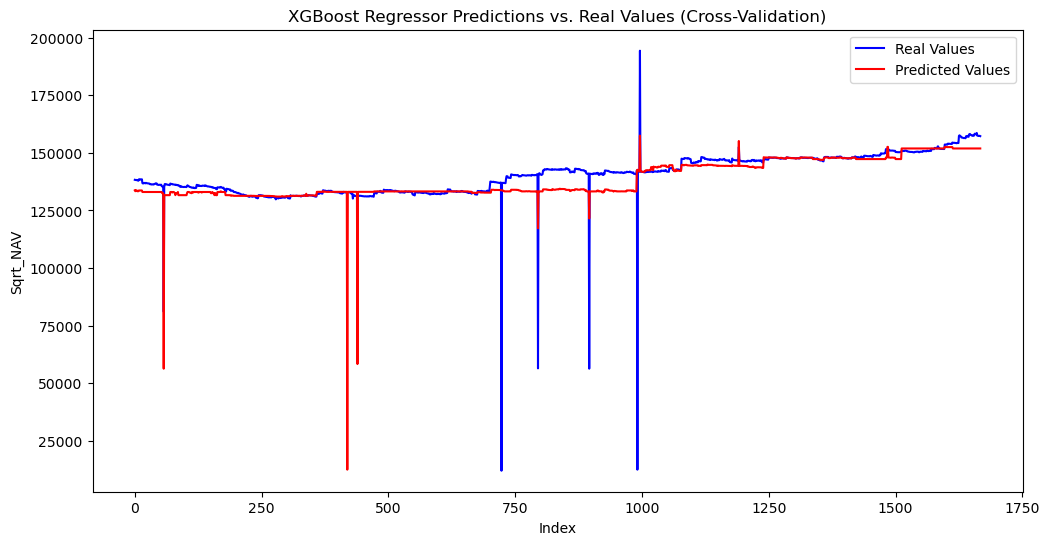

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=1000, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=1000, max_depth=1000, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, max_depth=1000),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=1000, max_depth=1000)
}

# Create a results dictionary to store model evaluation metrics
results = {
    'Model Name': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R^2': []
}

# Create a dictionary to store real values and predicted values for each model
model_predictions = {}

# Iterate through the models and evaluate their performance using cross-validation
for name, model in models.items():
    # Perform cross-validation to get predictions
    predictions = cross_val_predict(model, X, y, cv=5)

    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)

    results['Model Name'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(f'{r2 * 100:.4f}%')

    # Store real values and predicted values in the dictionary
    model_predictions[name] = {'Real Values': y, 'Predicted Values': predictions}

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print("Cross-Validation Model Evaluation Metrics:")
print(results_df)

# Create line plots with real values as blue lines and predicted values as red lines for each model
for name, predictions in model_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(predictions['Real Values'], color='blue', label='Real Values')
    plt.plot(predictions['Predicted Values'], color='red', label='Predicted Values')
    plt.xlabel('Index')
    plt.ylabel('Sqrt_NAV')
    plt.title(f'{name} Predictions vs. Real Values (Cross-Validation)')
    plt.legend()
    plt.show()

## Hyper parameter tuning

Best Lasso Alpha: 10.0
Best Ridge Alpha: 10.0


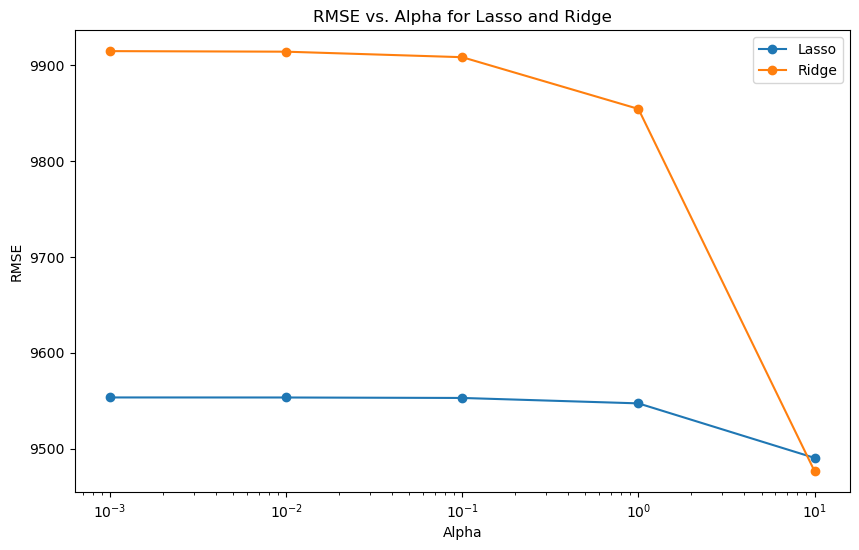

Lasso RMSE on Test Data: 8054.190983781622
Ridge RMSE on Test Data: 8039.054917247045


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to search through
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]  # You can adjust this range as needed

# Initialize lists to store results
lasso_rmse_scores = []
ridge_rmse_scores = []

# Iterate through alpha values and perform hyperparameter tuning
for alpha in alphas:
    # Create Lasso and Ridge regression models with the current alpha
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)
    
    # Perform cross-validation and calculate RMSE for Lasso and Ridge
    lasso_predictions = cross_val_predict(lasso_model, X, y, cv=5)
    ridge_predictions = cross_val_predict(ridge_model, X, y, cv=5)
    
    # Calculate RMSE for each model
    lasso_rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
    ridge_rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
    
    # Append RMSE scores to the respective lists
    lasso_rmse_scores.append(lasso_rmse)
    ridge_rmse_scores.append(ridge_rmse)

# Find the best alpha value for each model
best_lasso_alpha = alphas[np.argmin(lasso_rmse_scores)]
best_ridge_alpha = alphas[np.argmin(ridge_rmse_scores)]

print("Best Lasso Alpha:", best_lasso_alpha)
print("Best Ridge Alpha:", best_ridge_alpha)

# Plot RMSE scores for Lasso and Ridge across different alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_rmse_scores, marker='o', label='Lasso')
plt.plot(alphas, ridge_rmse_scores, marker='o', label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha for Lasso and Ridge')
plt.xscale('log')  # Since alpha values are typically on a logarithmic scale
plt.legend()
plt.show()

# Once you have the best alpha values, you can train the final models with these values
best_lasso_model = Lasso(alpha=best_lasso_alpha)
best_ridge_model = Ridge(alpha=best_ridge_alpha)

best_lasso_model.fit(X_train, y_train)
best_ridge_model.fit(X_train, y_train)

# Make predictions using the best models
lasso_predictions = best_lasso_model.predict(X_test)
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the best models on the test set (you can calculate RMSE, MAE, R^2, etc.)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("Lasso RMSE on Test Data:", lasso_rmse)
print("Ridge RMSE on Test Data:", ridge_rmse)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models with the best alpha values
best_lasso_alpha = 10  # Replace with the best alpha you found
best_ridge_alpha = 10  # Replace with the best alpha you found

lasso_model = Lasso(alpha=best_lasso_alpha)
ridge_model = Ridge(alpha=best_ridge_alpha)

# Create a list of tuples containing model names and their corresponding models
models = [('Lasso', lasso_model), ('Ridge', ridge_model)]

# Create a VotingRegressor as the ensemble model
ensemble_model = VotingRegressor(models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the ensemble model on the test set
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

print("Ensemble RMSE on Test Data:", ensemble_rmse)

Ensemble RMSE on Test Data: 8046.384254423508


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt

# Assuming 'nav' is your DataFrame and 'Sqrt_NAV' is the target variable
X = nav[['Log_ONU', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit', 'Year']]  # Replace 'Log_ONU' with the actual column name(s) you want to use as features
y = nav['Sqrt_NAV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Lasso and Ridge regression models with the best alpha values
best_lasso_alpha = 0.01  # Replace with the best alpha you found
best_ridge_alpha = 0.1  # Replace with the best alpha you found

lasso_model = Lasso(alpha=best_lasso_alpha)
ridge_model = Ridge(alpha=best_ridge_alpha)

# Create a list of tuples containing model names and their corresponding models
models = [('Lasso', lasso_model), ('Ridge', ridge_model)]

# Create a VotingRegressor as the ensemble model
ensemble_model = VotingRegressor(models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, ensemble_predictions)
mse = mean_squared_error(y_test, ensemble_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ensemble_predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - ensemble_predictions) / y_test)) * 100

# Calculate Theil's U
theil_u = np.sqrt(np.mean(((y_test - ensemble_predictions) ** 2) / (y_test ** 2)))

# Calculate daily returns
daily_returns = y_test.pct_change().dropna()

# Calculate annualized returns
def calculate_annualized_returns(returns):
    total_return = np.prod(1 + returns) - 1
    num_years = len(returns) / 252  # Assuming 252 trading days in a year
    annualized_return = (1 + total_return) ** (1 / num_years) - 1
    return annualized_return

annualized_returns = calculate_annualized_returns(daily_returns)

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    risk_free_rate = 0.03  # Replace with the appropriate risk-free rate
    excess_returns = returns - risk_free_rate
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    sharpe_ratio = mean_excess_return / std_excess_return
    return sharpe_ratio

sharpe_ratio = calculate_sharpe_ratio(daily_returns)

# Create a summary table
metrics_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared', 'MAPE', "Theil's U", 'Annualized Returns', 'Sharpe Ratio'],
    'Value': [mae, mse, rmse ,r2, mape, theil_u, annualized_returns, sharpe_ratio],
    'Interpretation': ['Lower is better', 'Lower is better', 'Lower is better', 'Closer to 1 is better',
                       'Lower is better', 'Lower is better', 'Positive values are better', 'Higher is better']
}

metrics_df = pd.DataFrame(metrics_dict)

# Print the summary table
print(metrics_df)

               Metric         Value              Interpretation
0                 MAE  3.555973e+03             Lower is better
1                 MSE  6.522810e+07             Lower is better
2                RMSE  8.076392e+03             Lower is better
3           R-squared  3.663087e-01       Closer to 1 is better
4                MAPE  5.452131e+00             Lower is better
5           Theil's U  5.780582e-01             Lower is better
6  Annualized Returns -4.688851e-02  Positive values are better
7        Sharpe Ratio  4.037845e-04            Higher is better


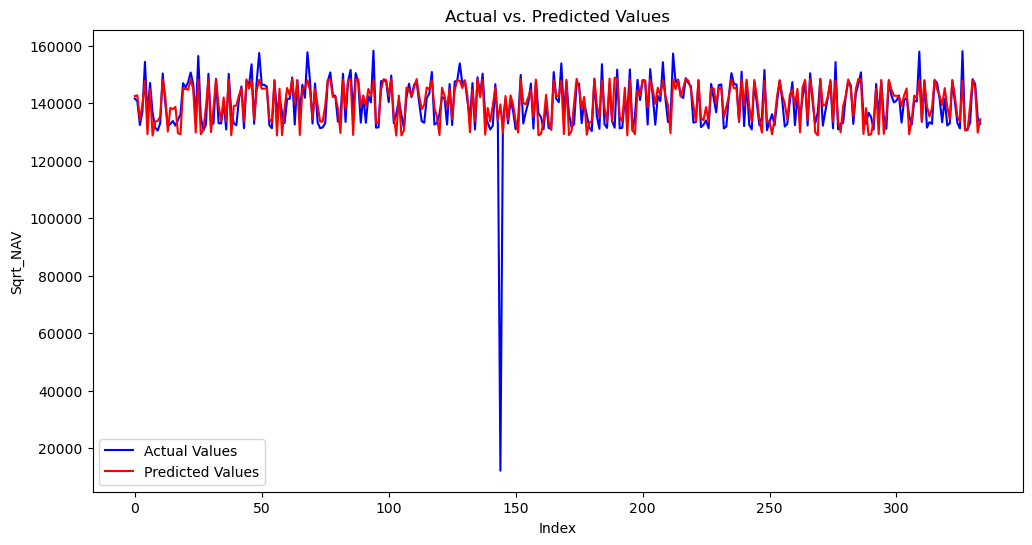

In [19]:
# Create a line plot to visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, color='blue', label='Actual Values')
plt.plot(ensemble_predictions, color='red', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Sqrt_NAV')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Year Column only performed better